In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
data['TotalCharges'] = data['TotalCharges'].replace(" ", None)
data['TotalCharges']=data['TotalCharges'].astype(float)

In [8]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
data['TotalCharges']=data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [10]:
data['TotalCharges'].isna().sum()

0

In [11]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [12]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
data=data.drop('customerID',axis=1)

In [14]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
x=data.drop('Churn',axis=1)
y=data['Churn']

In [16]:
for i in x:
    cat_var=x.select_dtypes(include=['object']).columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

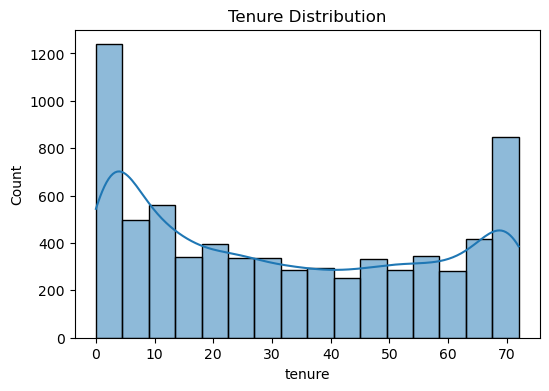

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(data['tenure'], kde=True)
plt.title("Tenure Distribution")
plt.show()

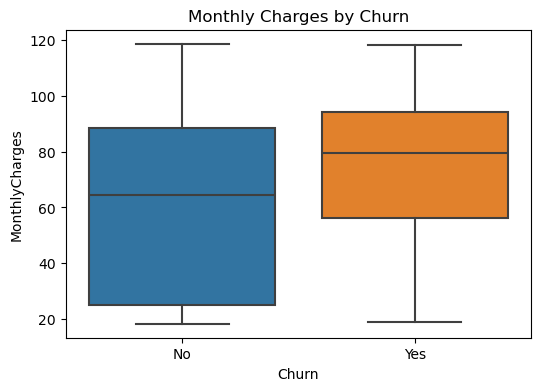

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(x=data['Churn'], y=data['MonthlyCharges'])
plt.title("Monthly Charges by Churn")
plt.show()

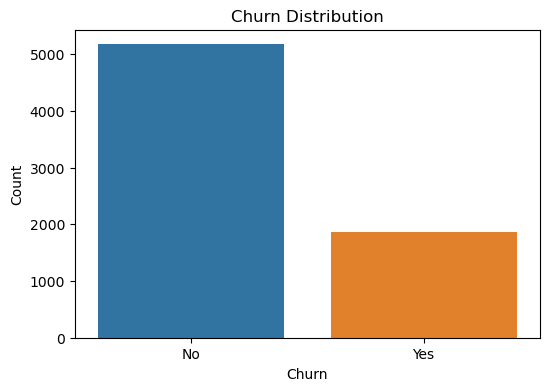

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

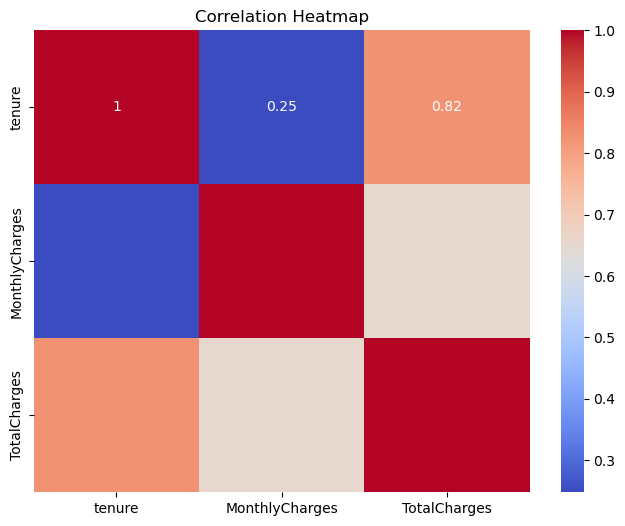

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(x[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [21]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()

In [22]:
x[cat_var]=OE.fit_transform(x[cat_var])

In [23]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65


In [24]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [25]:
y=LE.fit_transform(y)

In [26]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [27]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   float64
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   float64
 3   Dependents        7043 non-null   float64
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   float64
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   float64
 16  PaymentMethod     7043 non-null   float64


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [29]:
len(X_train),len(X_test)

(5634, 1409)

In [30]:
from sklearn.linear_model import LogisticRegression
LoRg=LogisticRegression()

In [31]:
LoRg.fit(X_train,Y_train)

LogisticRegression()

In [32]:
LR_y_pred = LoRg.predict(X_test)

In [33]:
LR_accuracy=LoRg.score(X_test, Y_test) * 100
LR_accuracy

80.55358410220013

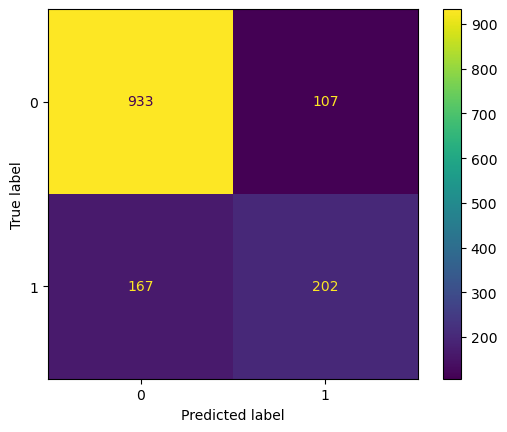

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(LoRg, X_test, Y_test)


In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(Y_test, LR_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1040
           1       0.65      0.55      0.60       369

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [37]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [38]:
DT.fit(X_train,Y_train)

DecisionTreeClassifier()

In [39]:
DT_y_pred=DT.predict(X_test)

In [40]:
DT_accuracy=DT.score(X_test,Y_test)*100
DT_accuracy

73.7402413058907

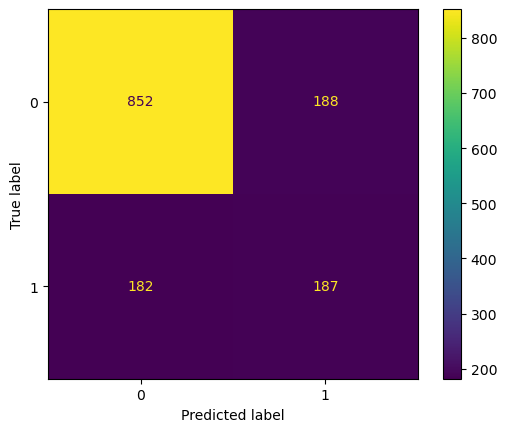

In [41]:
ConfusionMatrixDisplay.from_estimator(DT, X_test, Y_test)


In [42]:
print(classification_report(Y_test, DT_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1040
           1       0.50      0.51      0.50       369

    accuracy                           0.74      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.74      0.74      0.74      1409



In [43]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=100,random_state=90)

In [44]:
RF.fit(X_train,Y_train)

RandomForestClassifier(random_state=90)

In [45]:
RF_y_pred=RF.predict(X_test)

In [46]:
RF_accuracy=RF.score(X_test,Y_test)*100
RF_accuracy

79.347054648687

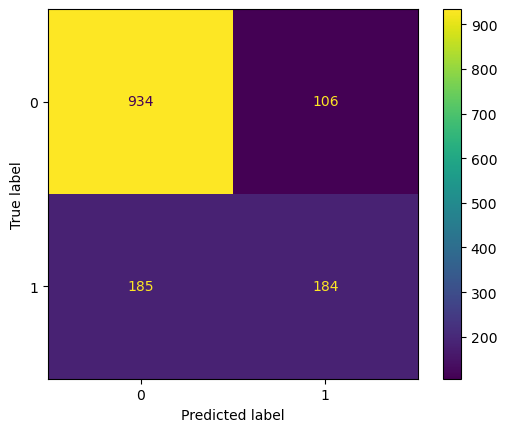

In [47]:
ConfusionMatrixDisplay.from_estimator(RF, X_test, Y_test)

In [48]:
print(classification_report(Y_test, RF_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1040
           1       0.63      0.50      0.56       369

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [49]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(n_estimators=100)

In [50]:
GB.fit(X_train,Y_train)

GradientBoostingClassifier()

In [51]:
GB_y_pred=GB.predict(X_test)

In [52]:
GB_accuracy=GB.score(X_test,Y_test)*100
GB_accuracy

80.0567778566359

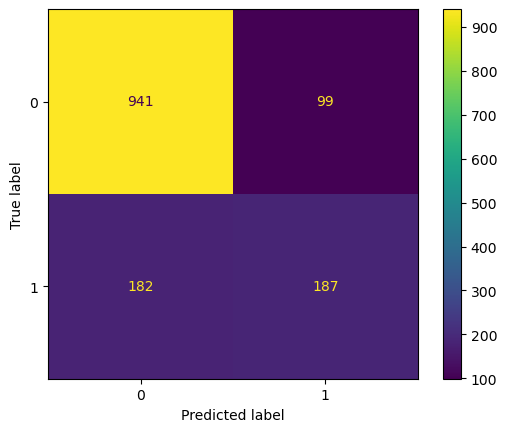

In [53]:
ConfusionMatrixDisplay.from_estimator(GB, X_test, Y_test)

In [54]:
print(classification_report(Y_test, GB_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1040
           1       0.65      0.51      0.57       369

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [55]:
print("LogisticRegression accuracy : ",LR_accuracy)
print("DecisionTreeClassifier accuracy : ",DT_accuracy)
print("RandomForestClassifier accuracy : ",RF_accuracy)
print("GradientBoostingClassifier accuracy : ",GB_accuracy)


LogisticRegression accuracy :  80.55358410220013
DecisionTreeClassifier accuracy :  73.7402413058907
RandomForestClassifier accuracy :  79.347054648687
GradientBoostingClassifier accuracy :  80.0567778566359


In [56]:
pred_df=pd.DataFrame({'Actual Values':Y_test,
                     'LR Prediction':LR_y_pred,
                     'DT Prediction':DT_y_pred,
                     'RF Prediction':RF_y_pred,
                     'GB Prediction':GB_y_pred})
pred_df.to_csv('Prediction.csv',index=False)

In [57]:
print("Final Model Selected: Logistic Regression")
print("Reason: Highest accuracy, simplest model, avoids overfitting.")


Final Model Selected: Logistic Regression
Reason: Highest accuracy, simplest model, avoids overfitting.
